In [1]:
# The aggregation of web traffic data is carried out as below.
# Step 1: Setup and define base URL and file Names
# Step 2: Download and load data 
# Step 3: Pre-process the data 
# Step 4: Transforma and aggregate the data 
# Step 5: Export data as csv
# Step 6: Chart the distribution of the average time spent on each path

#### Step 1: Setup and Define Base URL and File Names

In [2]:
# Set up the environment by importing libraries and defining the base URL and file names for the CSV files
import requests # to send http requests 
import pandas as pd
from io import StringIO #used to wrap the contents of the csv file and pass to the read_csv() function

# Creating a function to download a CSV file and return it as a pandas dataframe
def download_csv(url):
    response = requests.get(url)
    if response.status_code == 200: # checks if the http request to download the csv was successful with code 200
        data = StringIO(response.text)
        df = pd.read_csv(data)
        return df
    else:
        print(f"Failed to download {url}")
        return pd.DataFrame()

#### Step 2: Download and Load Data

In [3]:
# Define the base URL where the CSV files are stored;changing this will not impact the pipeline
base_url = "https://public.wiwdata.com/engineering-challenge/data/"

In [4]:
# Generate the file names for the CSV files enumerating the alphabets (a.csv to z.csv) in the list
file_names = [f"{letter}.csv" for letter in 'abcdefghijklmnopqrstuvwxyz']

# Combine the base URL with the file names to create the full URLs for each file
urls = [base_url + file_name for file_name in file_names]

# Download and combine the CSV files into a single DataFrame
dataframes = [download_csv(url) for url in urls]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()

,drop,length,path,user_agent,user_id
0,1,7,/,Mozilla/5.0 (X11; Fedora; Linux x86_64; rv:54....,378
1,0,11,/,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,220
2,0,4,/,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,449
3,0,8,/,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,314
4,0,4,/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,345


#### Step 3: Preprocess Data

In [5]:
# Preprocess the data by selecting the necessary columns and handling missing data
preprocessed_df = combined_df[['user_id', 'path', 'length']].dropna()

# Display the top rows 
preprocessed_df.head()

,user_id,path,length
0,378,/,7
1,220,/,11
2,449,/,4
3,314,/,8
4,345,/,4


#### Step 4: Transform and Aggregate Data

In [6]:
# Transform and aggregate the data by user_id and the length of time spent by each user on each path
aggregated_df = preprocessed_df.groupby(['user_id', 'path'])['length'].sum().reset_index()

# Pivot the table to have user_id as rows and paths as columns
pivot_df = aggregated_df.pivot(index='user_id', columns='path', values='length').fillna(0) # replace NaN with 0s
pivot_df = pivot_df.astype(int)

# Display the top rows of the pivoted dataframe
pivot_df.head()

path,/,/about,/features,/features/desktop,/features/mobile,/features/web,/pricing,/signup,/tutorial/end,/tutorial/intro,/tutorial/step-four,/tutorial/step-one,/tutorial/step-three,/tutorial/step-two
user_id,,,,,,,,,,,,,,
1,13,0,18,0,0,0,0,11,0,7,0,2,6,18
2,14,0,0,0,0,11,18,2,5,20,13,16,4,1
3,16,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,16,12,10,6,11,1
5,16,0,0,0,3,0,0,12,13,4,20,6,11,10


#### Step 5: Export to CSV

In [7]:
# Export the final dataframe to a CSV file
pivot_df.to_csv('aggregated_web_traffic.csv', index=True)

#### Step 6: Chart the distribution of the average time spent on each path

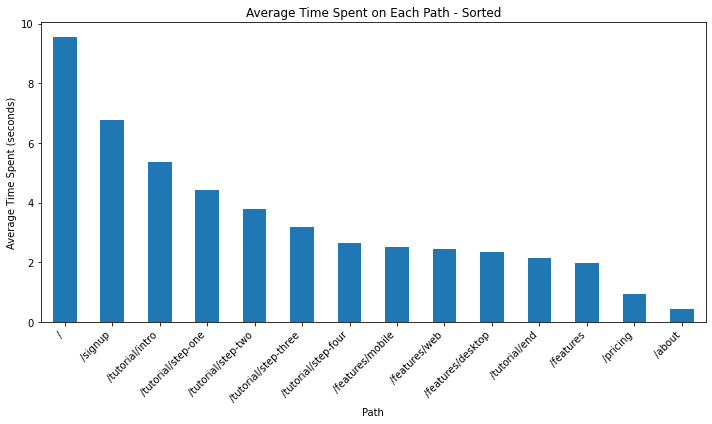

In [8]:
import matplotlib.pyplot as plt

path_averages = pivot_df.mean(axis=0)

# Sort the avg. time in descending order
path_avg_sorted = path_averages.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
path_avg_sorted.plot(kind='bar')
plt.title('Average Time Spent on Each Path - Sorted')
plt.xlabel('Path')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()